In [3]:
import os, sys, inspect

currentdir = os.path.dirname(os.path.abspath(os.path.join(inspect.getfile(inspect.currentframe()), os.pardir)))
currentdir = currentdir + "\\src\\"
sys.path.insert(0, currentdir)

import cv2
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
import img_logger
import feature_extractor as fe
import logging

logging.basicConfig(level=logging.INFO)

plt.rcParams['figure.figsize'] = [25, 25]
path_data = "..\input"
network_path = os.path.join("config", "frozen_east_text_detection.pb")


## Text detection

The method uses a network `frozen_east_text_detection.pb` that accompanies [this project](https://www.pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/)

The example shows that it does not perform very well. The text ROI is detected precisely but the content does not match.

['ARTICLE', 'TITLE ARTICLE', '2 \\-a5len=', 'TITLE ARTICLE', 'NFOGRAPHIC', 'BUSINESS', 'ARTICLE', 'TITLE', 'Saeed', 'TITLE ARTICLE', 'chee ow', '']


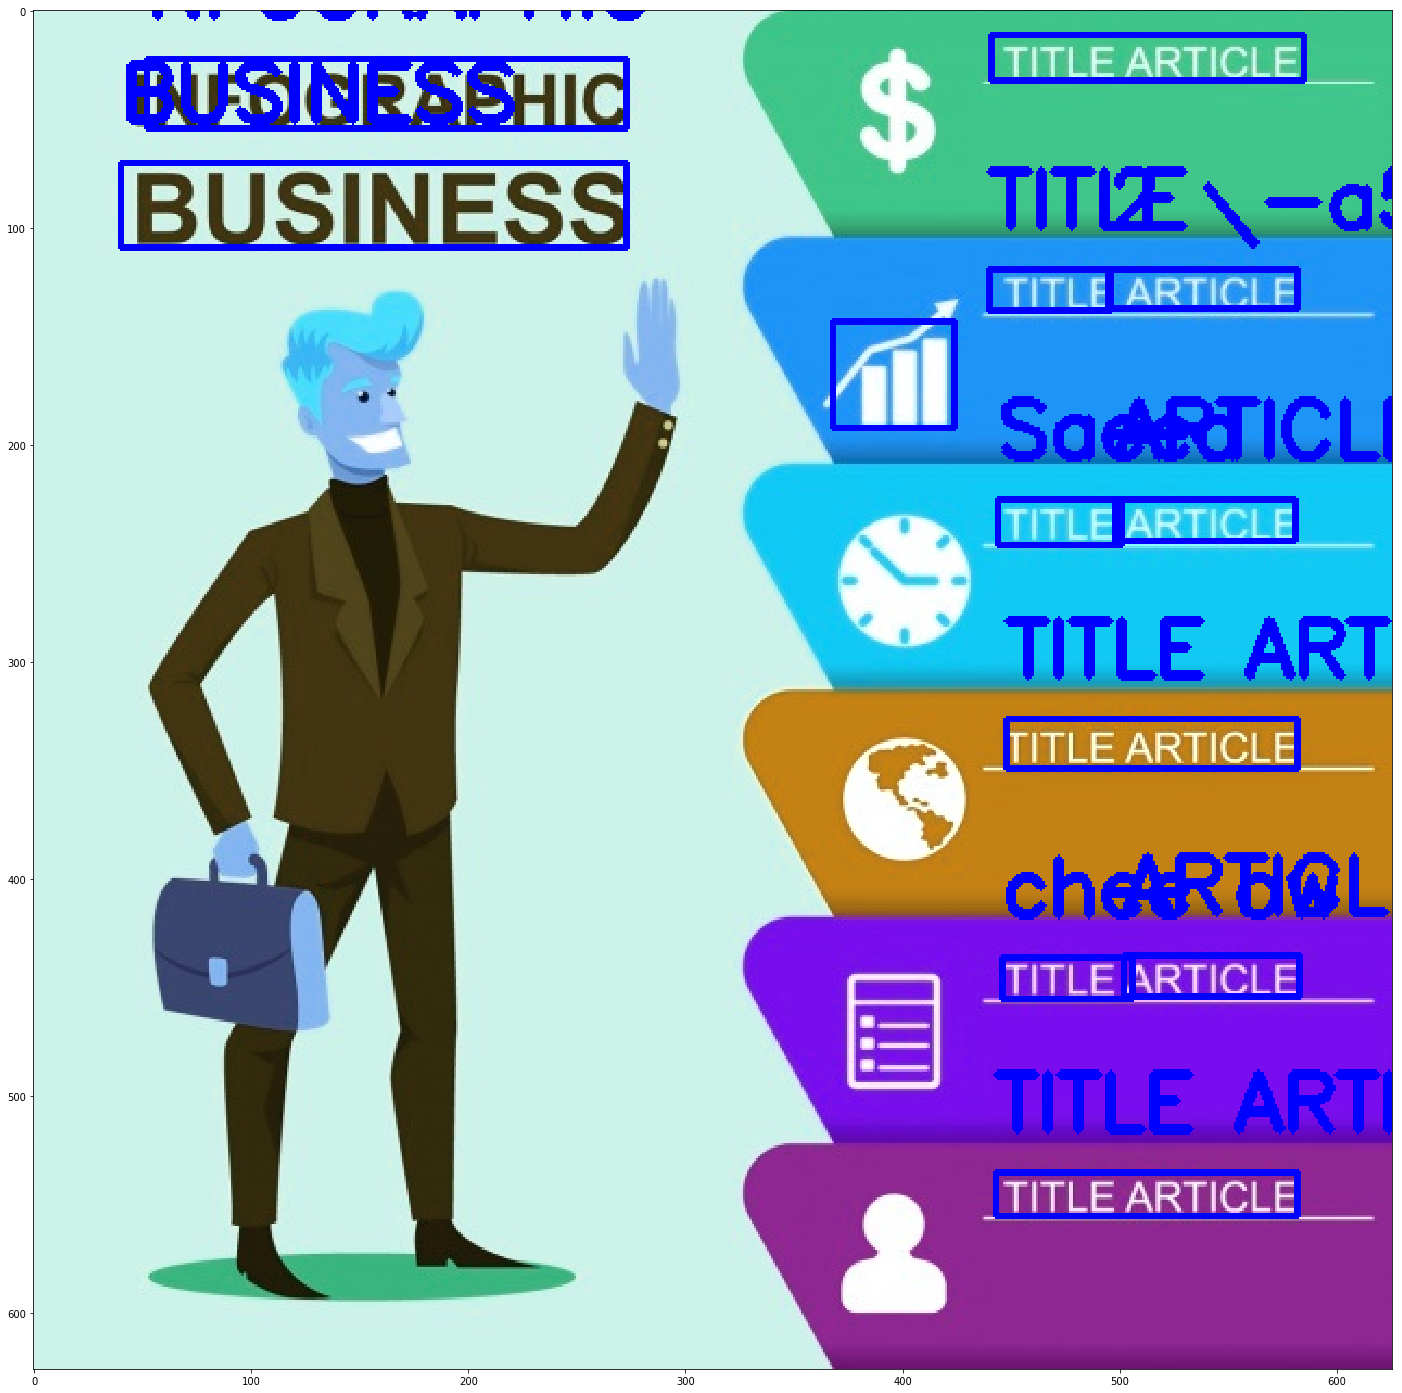

In [4]:
# test_infogfx.jpg comes from https://www.freepik.com/free-vector/business-infographic-template_1041341.htm
img = cv2.imread(os.path.join(path_data, "test_infogfx.jpg"))
img_gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gs, cmap="gray")

net = cv2.dnn.readNet(os.path.join( "..",network_path) )

texts = fe.get_text(img, net)

print([text for coors, text in texts])
img_logger.print_text(img, texts)
plt.imshow(img)